---
<style>
hr {
    border-width:2px;
    border-color:#75DFC1;
}
</style>
---

<center> <h1> Projet - Supply Chain </h1> </center>
<center> <h2> √âtape : Data Visualisation </h2></center>

---

# Informations explicatives

## Cat√©gorie cibl√©e : Services aux entreprises
## Sous cat√©gorie cibl√©e : Transport et logistique


On r√©cup√®re le DataFrame suivant :

1. `df_avis_Preprocessing.csv` contient les informations suivantes pour la sous-cat√©gorie cibl√©e :
   - Nom de l'entreprise
   - Nom du client
   - Nombre d'avis du client
   - Pays
   - Trust score
   - Date de l'avis
   - Titre de l'avis
   - Contenu de l'avis
   - R√©ponse de l'entreprise (Non si inexistant)
   - Ann√©e
   - Mois
   - Jour de la semaine
   - Weekend (1 si weekend, 0 sinon)
   - Jour du mois
   - Heure
   - Emojis pr√©sents dans l'avis
   - Texte repr√©sentant l'emoji
   - Langue de l'avis
   - Emojis extraits

In [2]:
# importation des packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Affichage des 5 premi√®res lignes du DataFrame
df = pd.read_csv("df_avis_Preprocessing1.csv")
df.head()

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  j'ai demand√© un transport pour aller de paris ...   
2  j'ai trouv√© cette soci√©t√© de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  year  month  weekday  \
0                                                Non  2023     12        4   
1                                                Non  2024      4        0   
2                                                Non  2024      3        5   
3                                                Non  2023      2        3   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023     10        1   

   weekend  day  hour emojis emojis_text Langue extracted_emojis  
0        0    8    10    NaN         NaN     fr              NaN  
1        0    8     1    NaN         NaN     fr              NaN  
2        1    9    22    NaN         NaN     fr              NaN  
3        0   16    23    NaN         NaN     fr              NaN  
4        0    3    23    NaN         NaN     fr              NaN

In [4]:
# Affichage des informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    504982 non-null  object
 1   Nom_Client        505056 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505129 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505022 non-null  object
 7   Contenu_avis      505040 non-null  object
 8   R√©ponse_Entrpris  505129 non-null  object
 9   year              505129 non-null  int64 
 10  month             505129 non-null  int64 
 11  weekday           505129 non-null  int64 
 12  weekend           505129 non-null  int64 
 13  day               505129 non-null  int64 
 14  hour              505129 non-null  int64 
 15  emojis            11652 non-null   object
 16  emojis_text       12158 non-null   ob

Note
5    301672
1    136352
4     39902
3     14235
2     12968
Name: count, dtype: int64

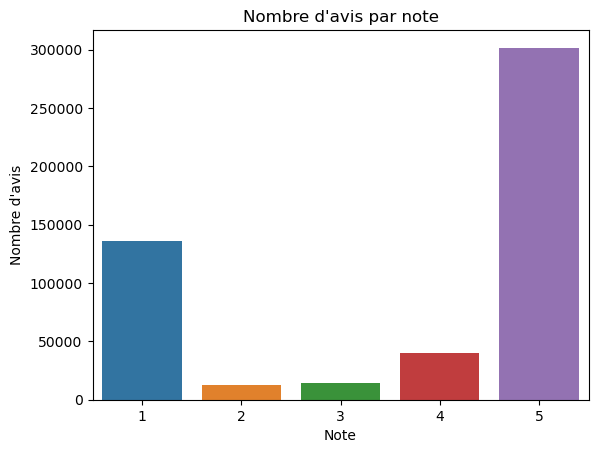

In [5]:
display(df.Note.value_counts())

# Affichage de la distribution des notes
sns.countplot(x=df['Note'])
plt.title("Nombre d'avis par note")
plt.ylabel("Nombre d'avis")
plt.show()

In [18]:
# D√©finir nuage des mots
from nltk.corpus import stopwords 

# Initialiser la variable des mots vides en fran√ßais
Stop_words = set(stopwords.emojis('french'))

# Ajouter √† la liste des stopwords des √©l√©ments de syntaxe qui ne servent pas √† l'analyse du texte
new_stop_words = ["m'a","j'ai","a",",", ".", "``", "@", "*", "(", ")", "...", "!", "?", "-", "_", ">", "<", ":", "/", "=", "--", "¬©", "~", ";", "\\", "\\\\"]
Stop_words.update(new_stop_words)
print(Stop_words)

# D√©finir la fonction stop_words_filtering
def Stop_words_filtering(text):
    words = text.split()
    filtered_list = [mot for mot in words if mot not in Stop_words]
    return ' '.join(filtered_list)  # Rejoindre les mots filtr√©s en une seule cha√Æne de texte

    
# Appliquer la fonction de filtrage sur la colonne 'Contenu_avis'
df['Contenu_avis'] = df['Contenu_avis'].astype(str).apply(Stop_words_filtering)

# Afficher le DataFrame apr√®s filtrage
df.head()


{'(', '√©t√©', 'avec', 'sommes', 'soyons', '@', 'e√ªt', 'aie', 'votre', 'au', 'serait', 'ces', 'il', 'eut', 'ce', 'ait', 'ta', 'seront', 'aux', 'te', '√©tantes', 'seriez', 'notre', '√†', 'lui', '√™tes', 'qui', 'eurent', 'auriez', 'l', 'fussent', 'eussent', 'avais', '--', 'j', 'ils', 'aient', 'dans', 'vous', 'ayante', 'sa', 'pour', 'un', '¬©', 'les', '...', '>', 'du', 'aurions', 'on', 'y', 'e√ªtes', 'f√ªt', '.', 'aurons', 'mon', 'eux', 'ai', 'le', 't', 'ayons', "j'ai", 'd', 'auras', 'elle', 's', 'son', '_', 'es', 'c', 'eues', 'me', 'soyez', 'ne', 'aurez', 'ses', 'serai', '√©tions', 'des', 'pas', 'serions', 'ayez', ':', 'fus', '√©t√©s', 'f√ªtes', 'la', 'fusses', 'que', '!', '\\\\', 'eus', 'avions', 'soient', 'soit', '-', 'ayantes', '*', '=', '√©tais', 'as', '/', 'avons', '√©tants', 'je', 'm', 'e√ªmes', '√©tant', 'mais', 'avez', 'et', '√©t√©es', 'eusses', 'eusse', 'toi', 'moi', 'serez', 'fusse', 'serais', 'sois', 'a', 'aviez', '~', 'seras', "m'a", 'mes', 'eussiez', ')', '√©tante', 'm√™me'

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse res...   
1  demand√© transport aller paris lyon √ßa s'est bi...   
2  trouv√© cette soci√©t√© transporteur peu hasard s...   
3  si recherchez service coursier professionnel a...   
4  monsieur flingu√© mission humanitaire maroc 24h...   

                                    R√©ponse_Entrpris  year  month  weekday  \
0                                                Non  2023     12        4   
1                                                Non  2024      4        0   
2                                                Non  2024      3        5   
3                                                Non  2023      2        3   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023     10        1   

   weekend  day  hour emojis emojis_text Langue extracted_emojis  
0        0    8    10    NaN         NaN     fr              NaN  
1        0    8     1    NaN         NaN     fr              NaN  
2        1    9    22    NaN         NaN     fr              NaN  
3        0   16    23    NaN         NaN     fr              NaN  
4        0    3    23    NaN         NaN     fr              NaN

# Cr√©ation d'un histogramme¬∂




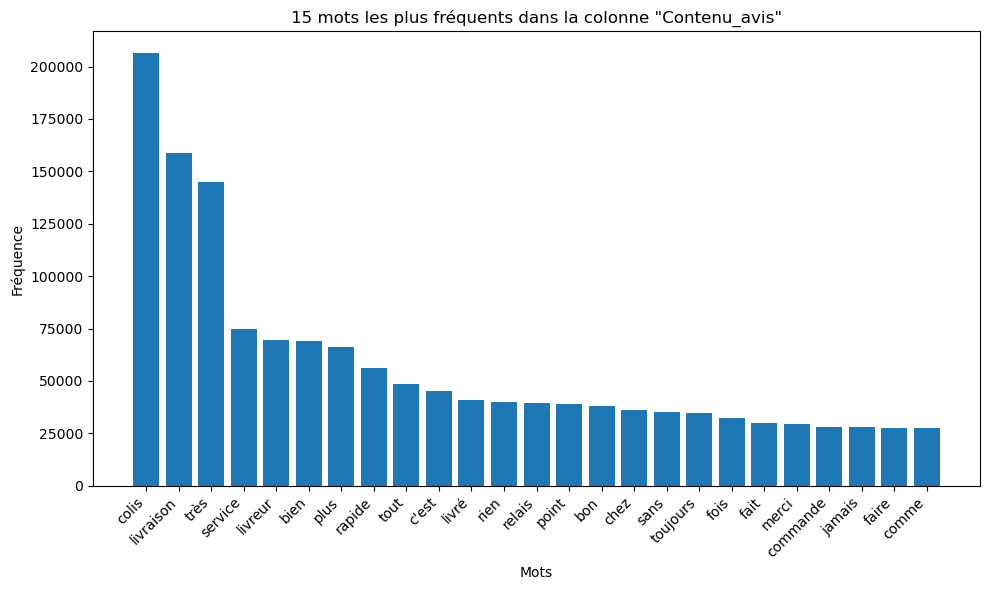

In [24]:
from collections import Counter

# Compter la fr√©quence de chaque mot dans la colonne 'Contenu_avis'
word_counts = Counter(' '.join(df['Contenu_avis']).split())

# Extraire les 25 mots les plus fr√©quents et leurs fr√©quences
top_words = word_counts.most_common(25)
top_words, frequencies = zip(*top_words)

# Cr√©er le graphe
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies)
plt.xlabel('Mots')
plt.ylabel('Fr√©quence')
plt.title('15 mots les plus fr√©quents dans la colonne "Contenu_avis"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphe
plt.show()


# Fr√©quence des mots par note

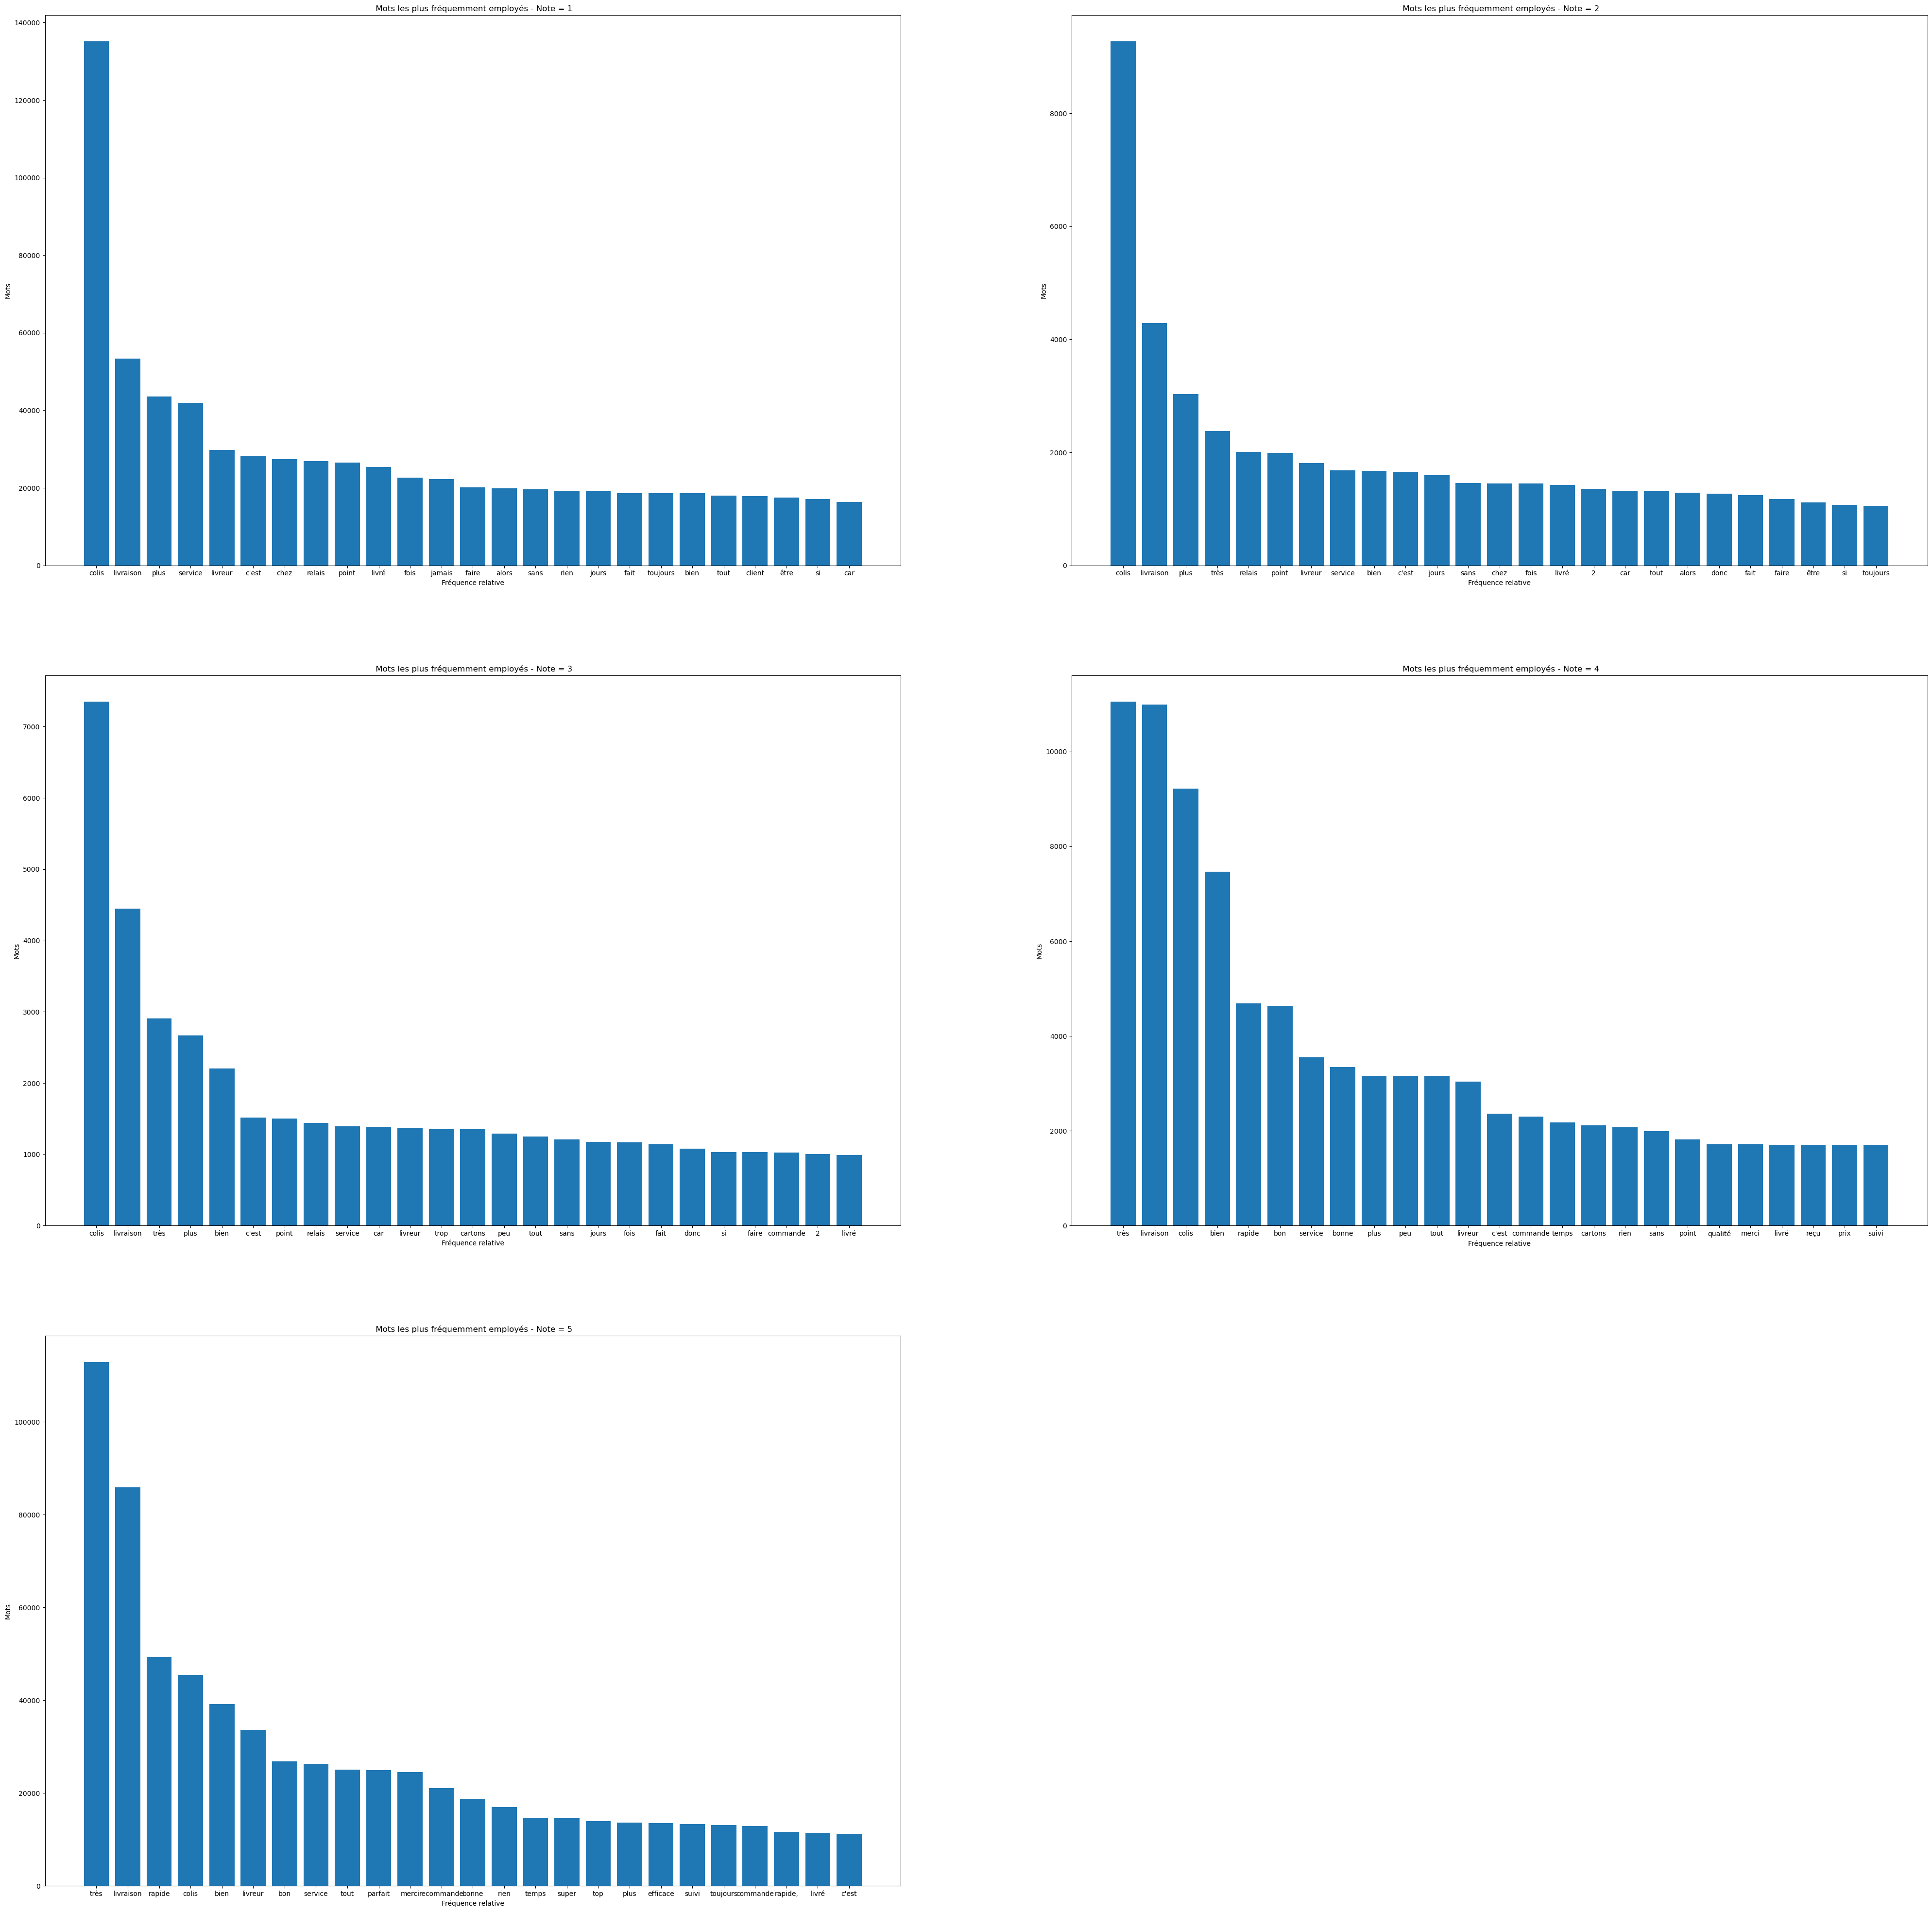

In [25]:
plt.figure(figsize=(50, 50))
plt.subplot(321)
word_counts_1 = Counter(' '.join(df.loc[df["Note"]==1 ,"Contenu_avis"]).split())
top_words_1 = word_counts_1.most_common(25)
top_words_1, frequencies_1 = zip(*top_words_1)

plt.bar(top_words_1, frequencies_1)
plt.title(' Mots les plus fr√©quemment employ√©s - Note = 1')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Mots')


plt.subplot(322)
word_counts_2 = Counter(' '.join(df.loc[df["Note"]==2 ,"Contenu_avis"]).split())
top_words_2 = word_counts_2.most_common(25)
top_words_2, frequencies_2 = zip(*top_words_2)

plt.bar(top_words_2, frequencies_2)
plt.title(' Mots les plus fr√©quemment employ√©s - Note = 2')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Mots')


plt.subplot(323)
word_counts_3 = Counter(' '.join(df.loc[df["Note"]==3 ,"Contenu_avis"]).split())
top_words_3 = word_counts_3.most_common(25)
top_words_3, frequencies_3 = zip(*top_words_3)

plt.bar(top_words_3, frequencies_3)
plt.title(' Mots les plus fr√©quemment employ√©s - Note = 3')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Mots')


plt.subplot(324)
word_counts_4 = Counter(' '.join(df.loc[df["Note"]==4 ,"Contenu_avis"]).split())
top_words_4 = word_counts_4.most_common(25)
top_words_4, frequencies_4 = zip(*top_words_4)

plt.bar(top_words_4, frequencies_4)
plt.title(' Mots les plus fr√©quemment employ√©s - Note = 4')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Mots')


plt.subplot(325)
word_counts_5 = Counter(' '.join(df.loc[df["Note"]==5 ,"Contenu_avis"]).split())
top_words_5 = word_counts_5.most_common(25)
top_words_5, frequencies_5 = zip(*top_words_5)

plt.bar(top_words_5, frequencies_5)
plt.title(' Mots les plus fr√©quemment employ√©s - Note = 5')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Mots')

plt.show();

### Indicateurs par note

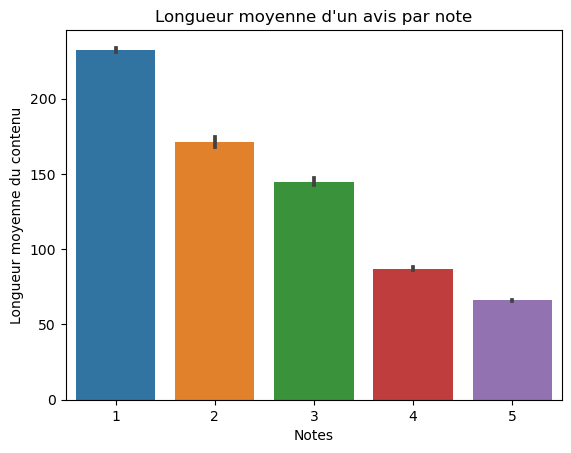

In [20]:
#Visualisation de la longueur par note
length = df["Contenu_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du contenu")
plt.title("Longueur moyenne d'un avis par note")
plt.show();

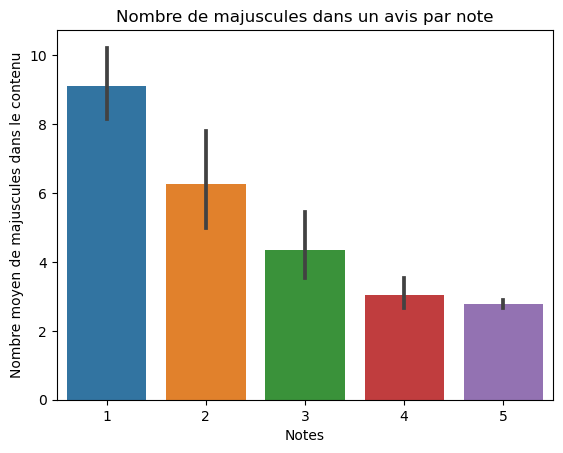

In [26]:
# Visualisation des majuscules par note
nb_maj = df["Contenu_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Cr√©ation d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le contenu")
plt.title("Nombre de majuscules dans un avis par note")
plt.show();

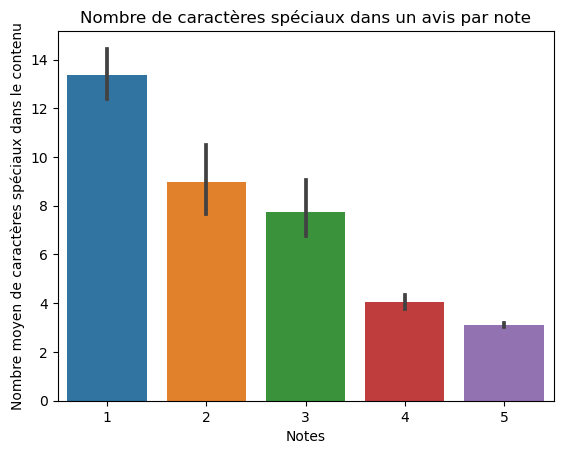

In [27]:
def count_special_chars(s):
    special_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~" #Liste de tous les caract√®res sp√©ciaux
    return sum(1 for c in s if c in special_chars)

sns.barplot(x = df["Note"], y = df["Contenu_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caract√®res sp√©ciaux dans le contenu")
plt.title("Nombre de caract√®res sp√©ciaux dans un avis par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

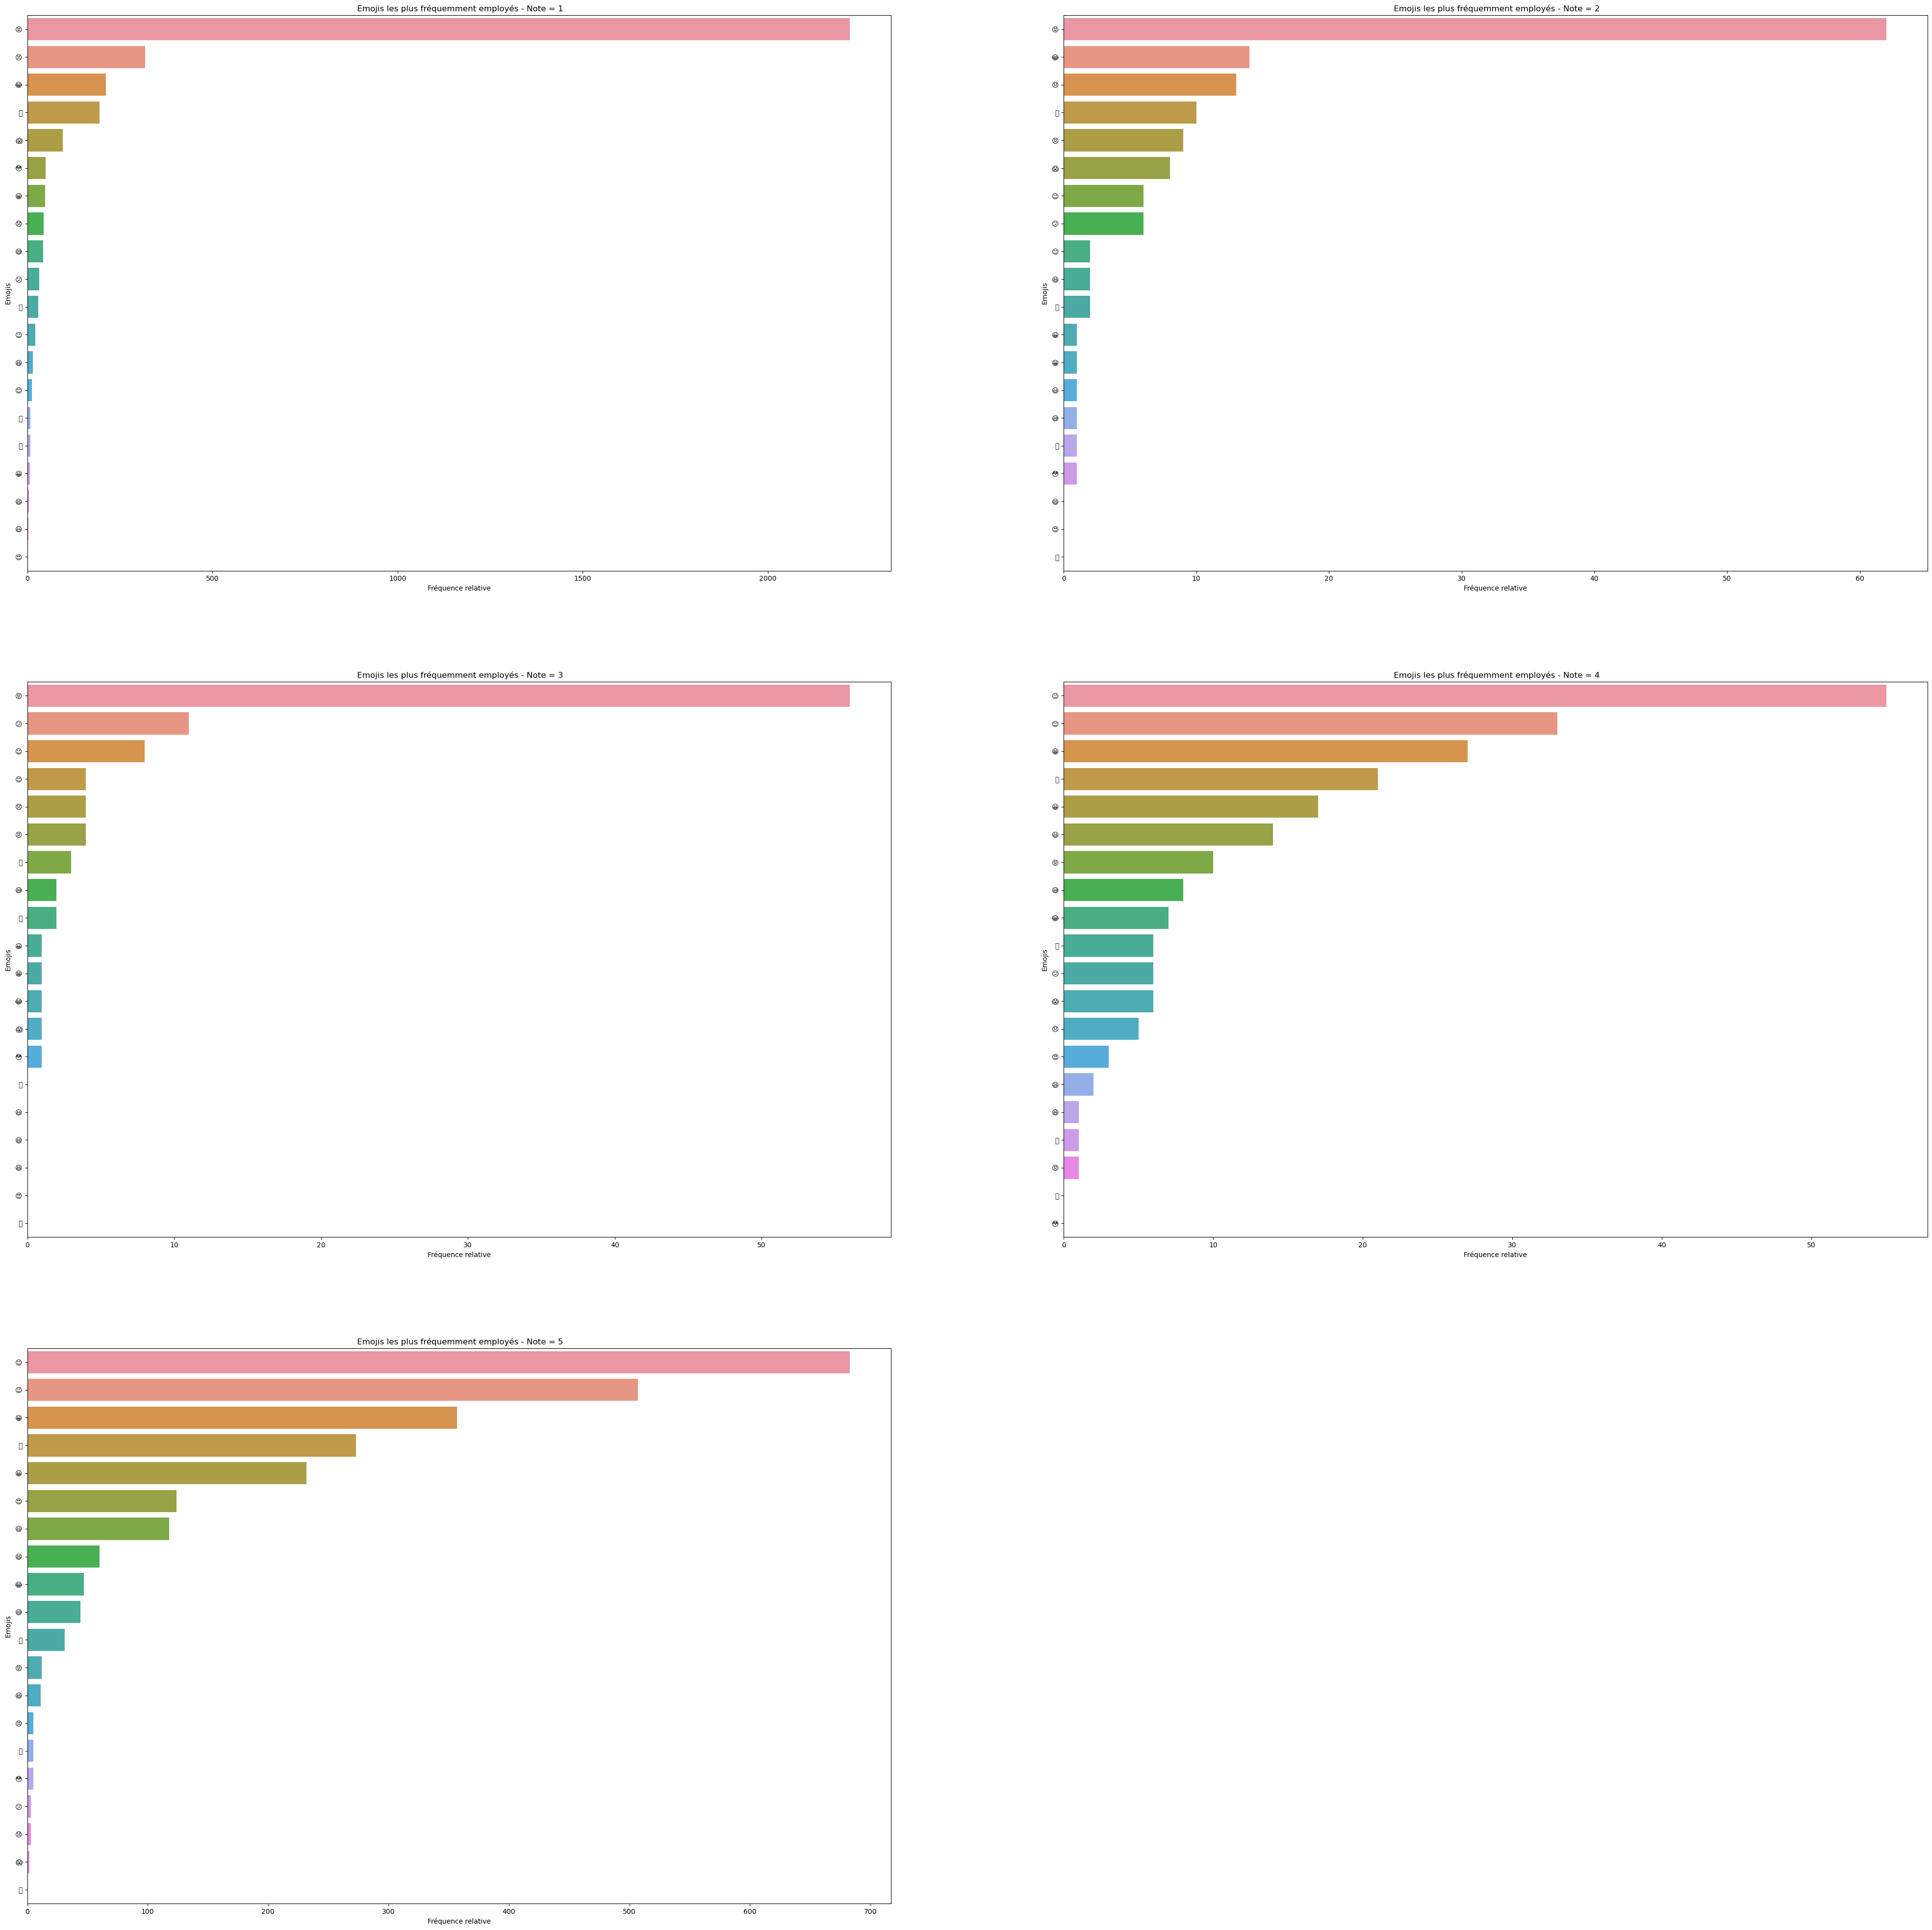

In [31]:
# Fonction compteur emojis
def count_emojis(col):
    # Cr√©ation d'une liste d'√©mojis
    emo = ["üòä","üòâ", "üòÄ", "üòÅ", "üòÇ", "ü§£", "üòÉ", "üòÑ", "üòÖ", "üòÜ", "üòç", "üôÇ", "üòï", "üòû", "üôÅ", "üò†", "üò°", "üò¨", "üò±", "üò≥"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des √©mojis et de leurs fr√©quences en fonction de la fr√©quence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Contenu_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 1')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Contenu_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 2')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Contenu_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 3')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Contenu_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 4')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Contenu_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 5')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par titre

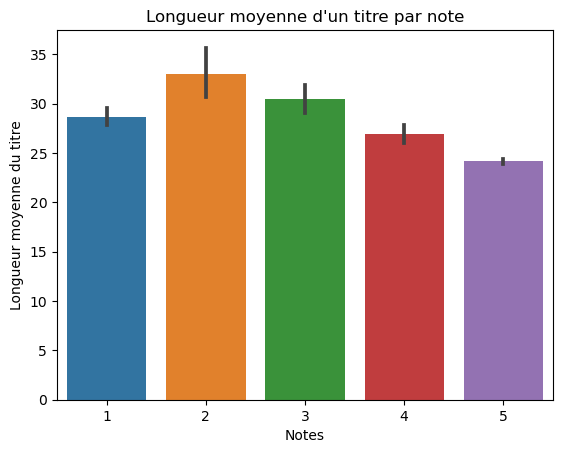

In [28]:
#Visualisation de la longueur du titre par note
length = df["Titre_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du titre")
plt.title("Longueur moyenne d'un titre par note")
plt.show();

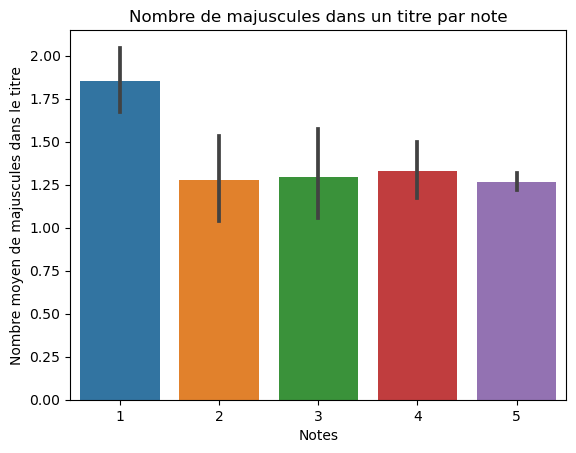

In [29]:
# Visualisation des majuscules d'un titre par note
nb_maj = df["Titre_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Cr√©ation d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le titre")
plt.title("Nombre de majuscules dans un titre par note")
plt.show();

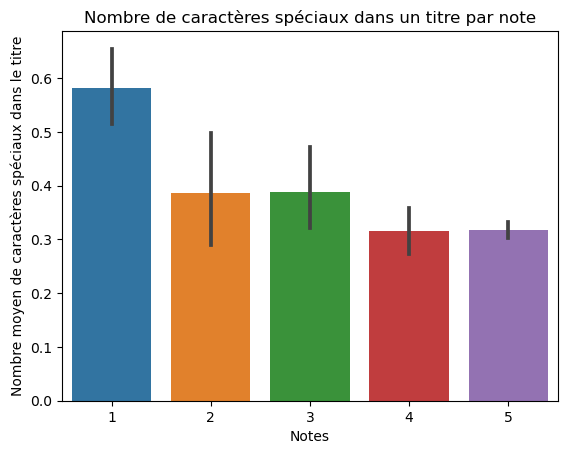

In [31]:
sns.barplot(x = df["Note"], y = df["Titre_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caract√®res sp√©ciaux dans le titre")
plt.title("Nombre de caract√®res sp√©ciaux dans un titre par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

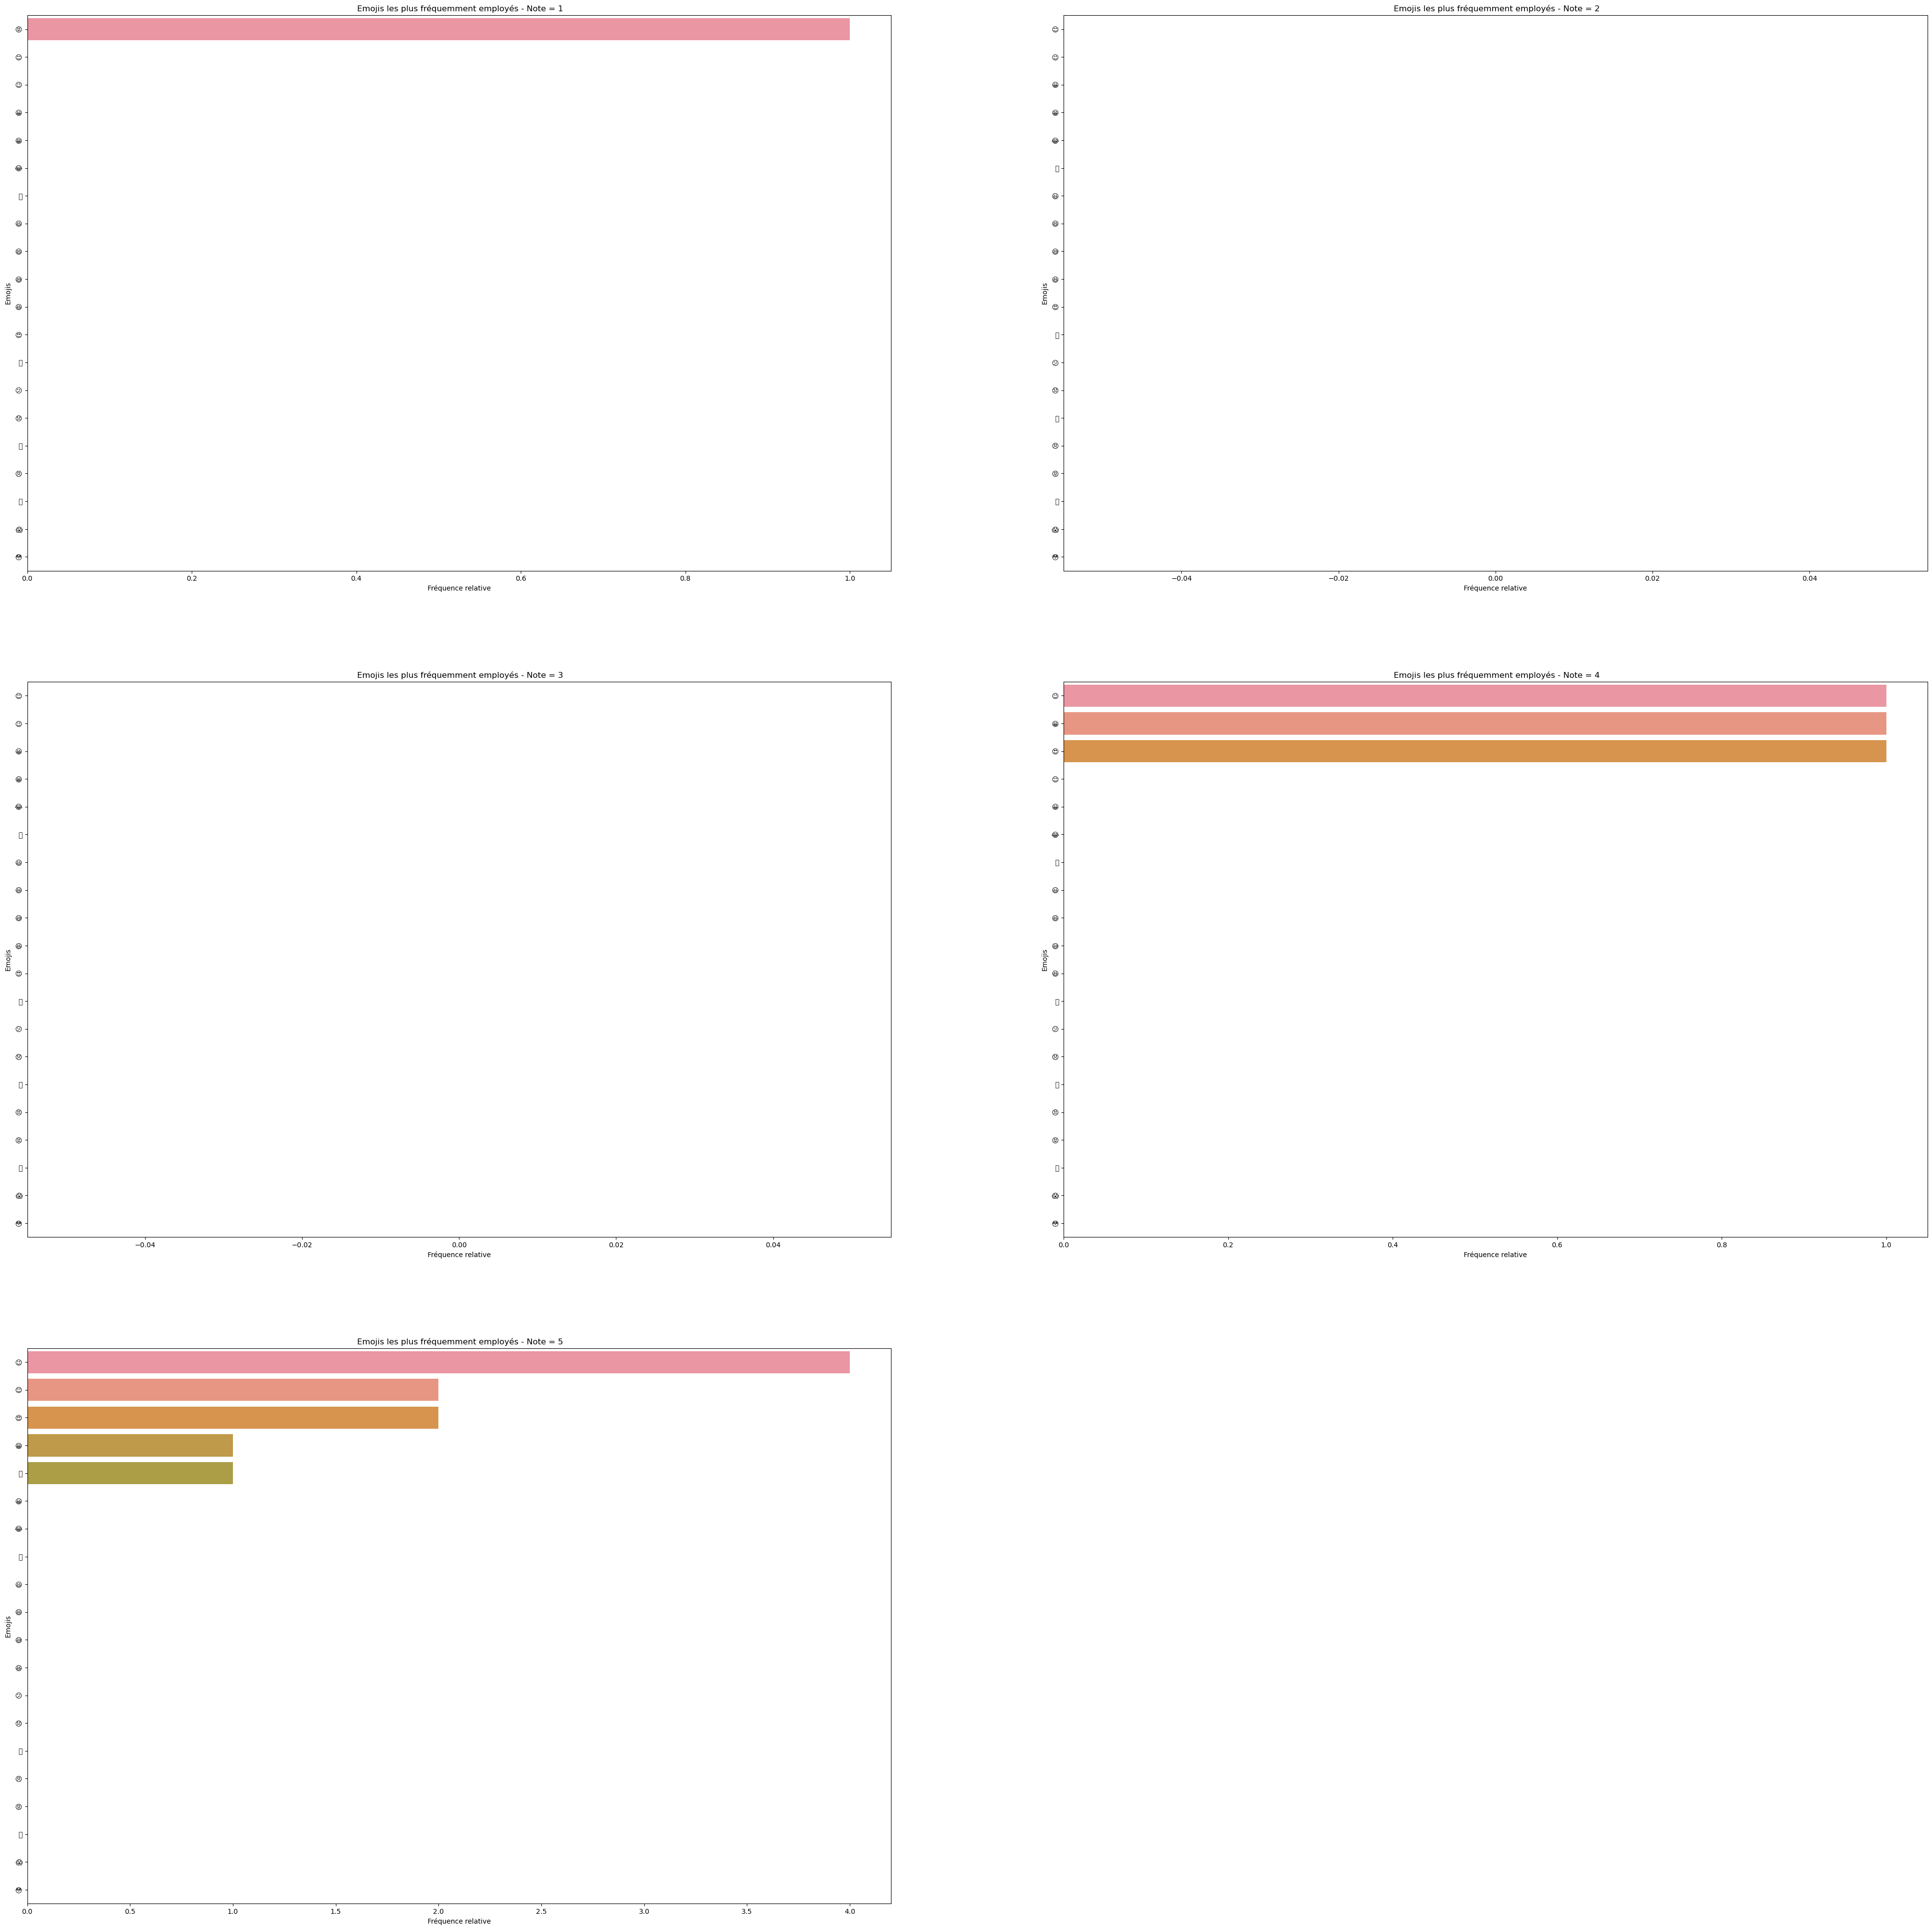

In [82]:
# Fonction compteur emojis
def count_emojis(col):
    # Cr√©ation d'une liste d'√©mojis
    emo = ["üòä","üòâ", "üòÄ", "üòÅ", "üòÇ", "ü§£", "üòÉ", "üòÑ", "üòÖ", "üòÜ", "üòç", "üôÇ", "üòï", "üòû", "üôÅ", "üò†", "üò°", "üò¨", "üò±", "üò≥"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des √©mojis et de leurs fr√©quences en fonction de la fr√©quence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Titre_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 1')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Titre_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 2')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Titre_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 3')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Titre_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 4')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Titre_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 5')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par r√©ponse

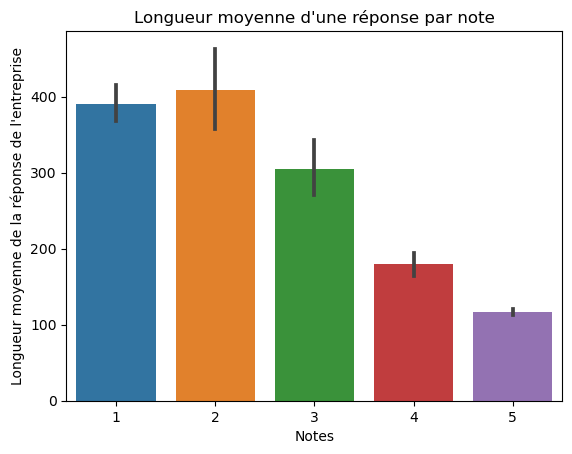

In [32]:
#Visualisation de la longueur de la r√©ponse par note
length = df["R√©ponse_Entrpris"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne de la r√©ponse de l'entreprise")
plt.title("Longueur moyenne d'une r√©ponse par note")
plt.show();

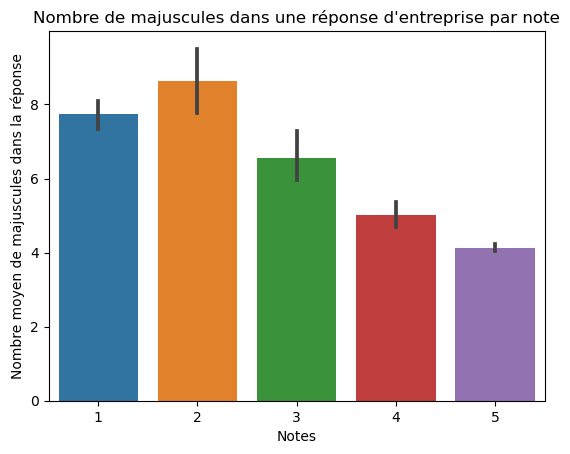

In [33]:
# Visualisation des majuscules d'une r√©ponse par note
nb_maj = df["R√©ponse_Entrpris"].apply(lambda x: sum(1 for c in x if c.isupper())) # Cr√©ation d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans la r√©ponse")
plt.title("Nombre de majuscules dans une r√©ponse d'entreprise par note")
plt.show();

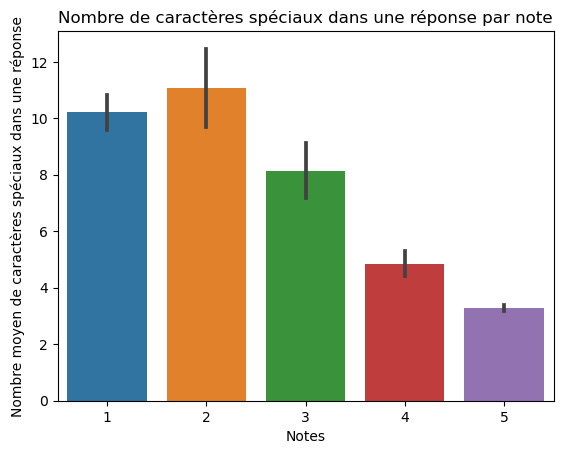

In [34]:
sns.barplot(x = df["Note"], y = df["R√©ponse_Entrpris"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caract√®res sp√©ciaux dans une r√©ponse")
plt.title("Nombre de caract√®res sp√©ciaux dans une r√©ponse par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

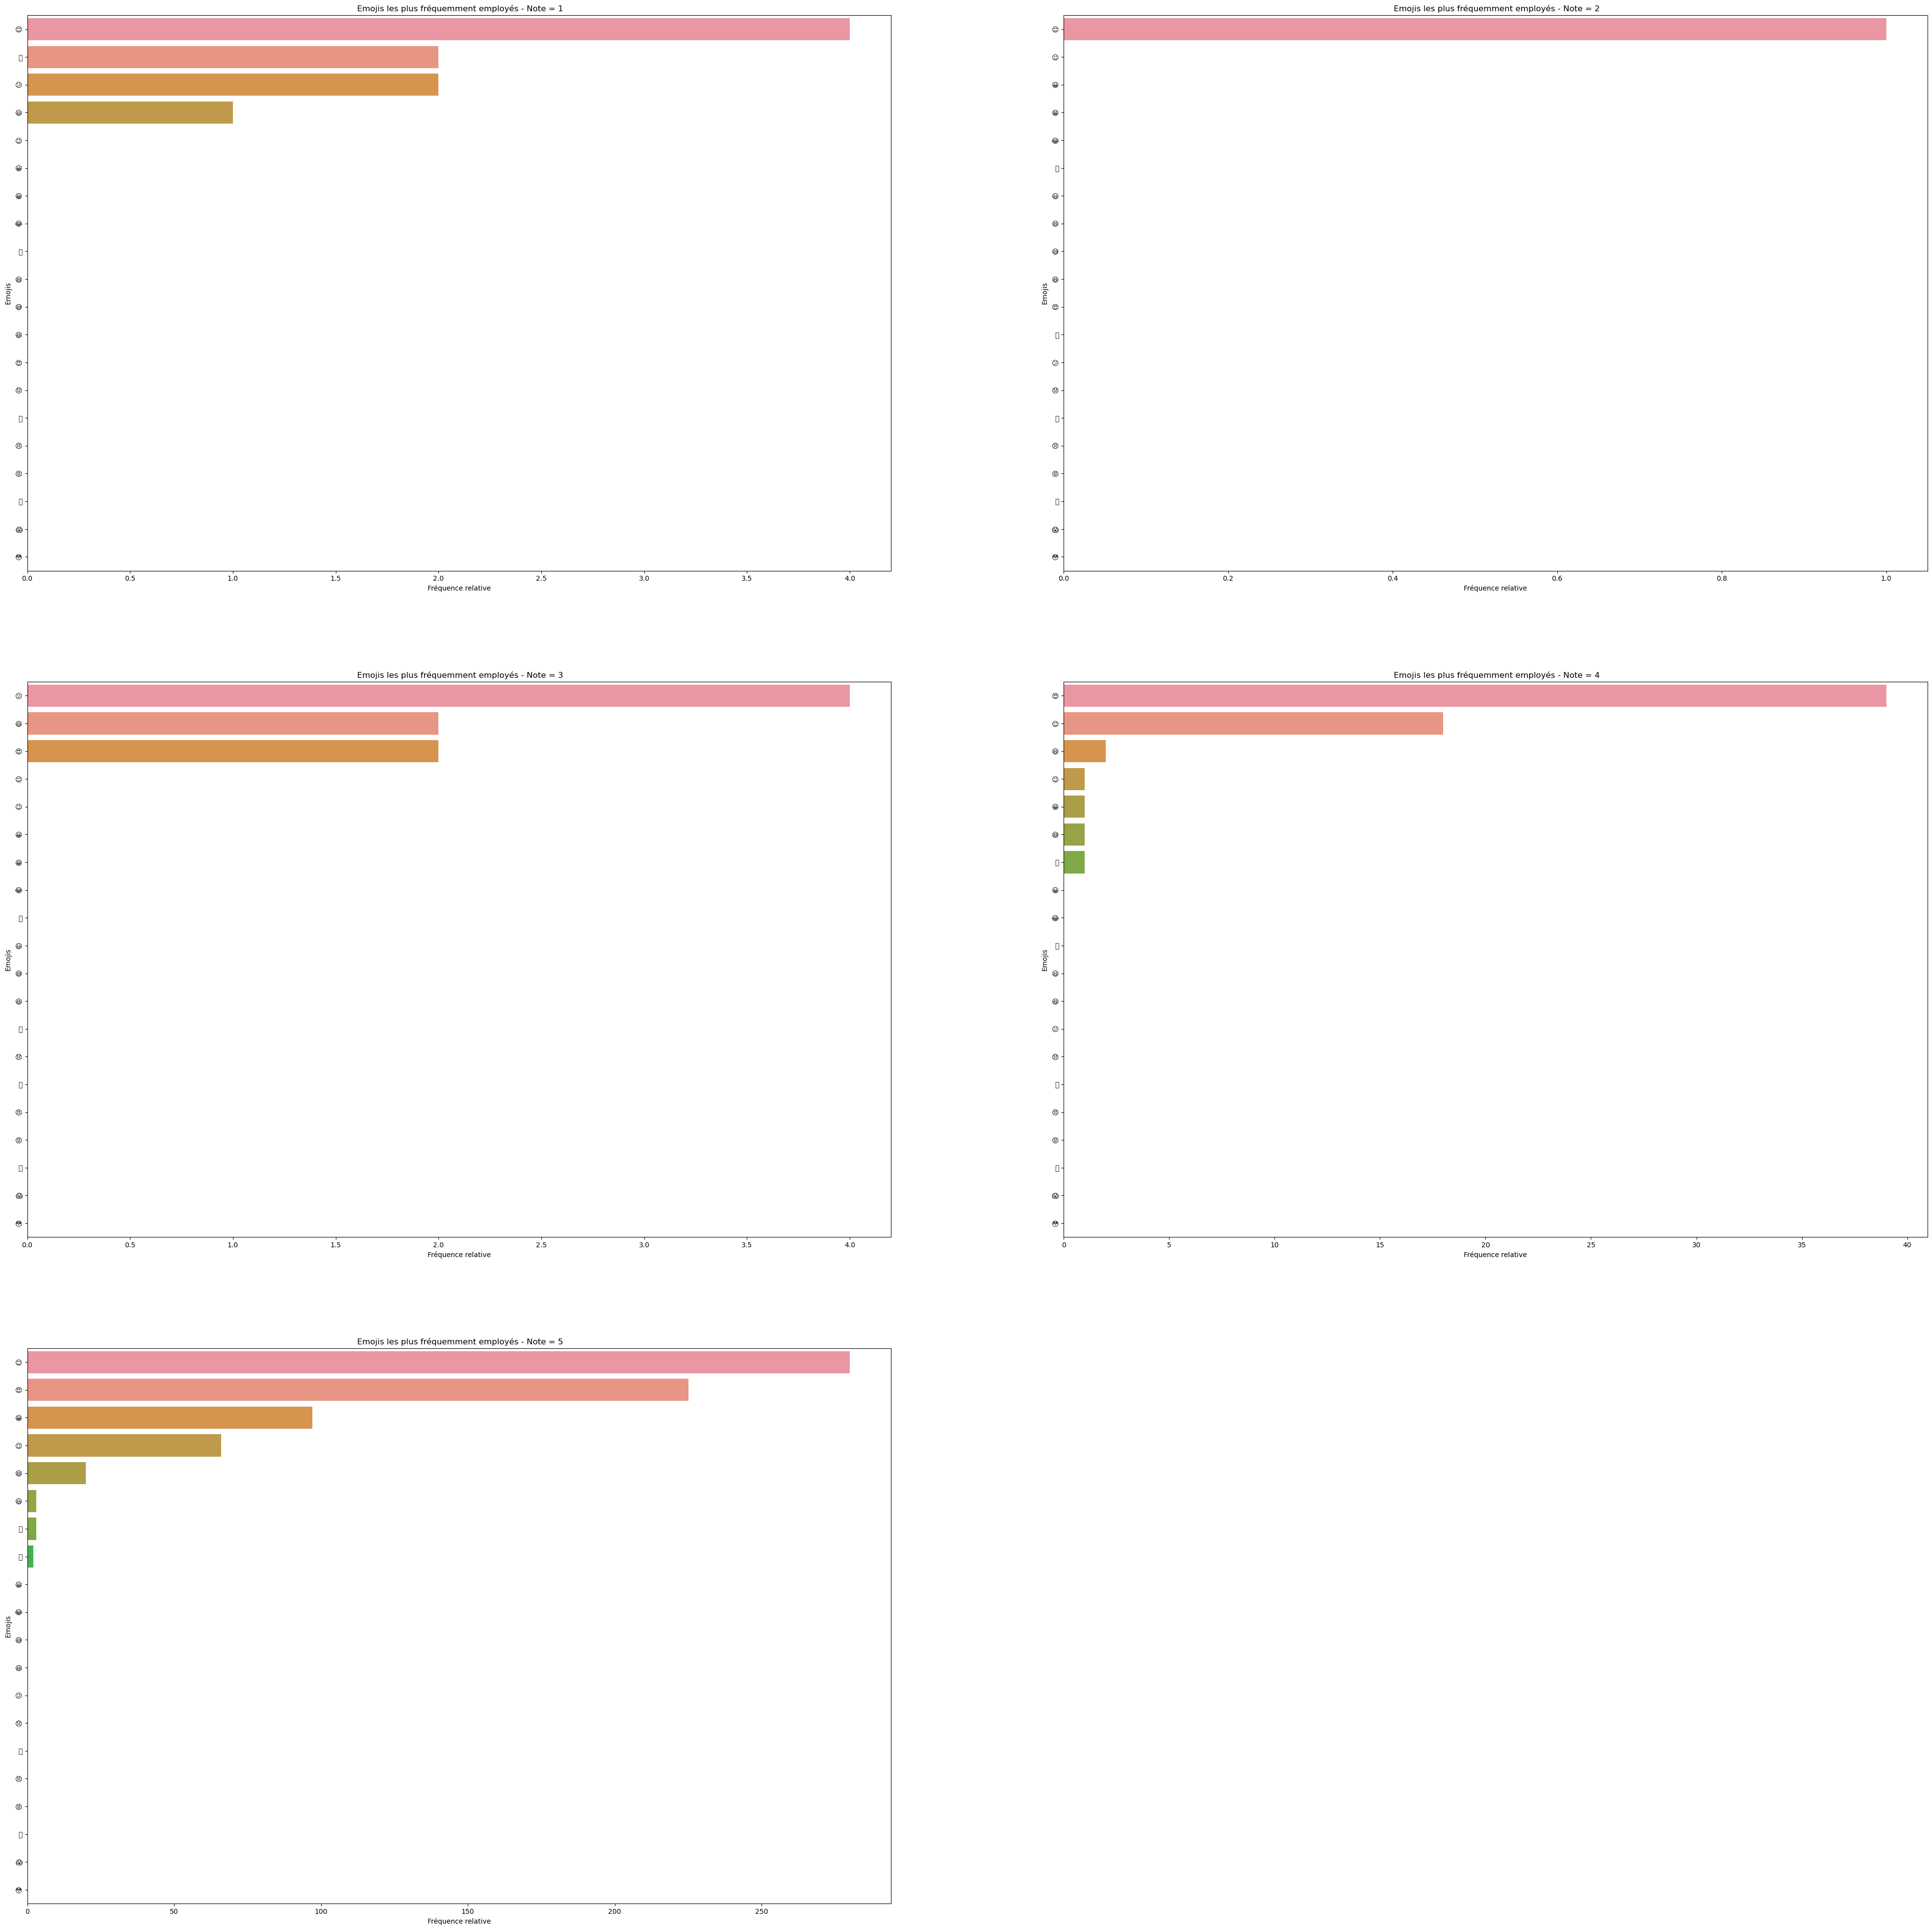

In [81]:
# Fonction compteur emojis
def count_emojis(col):
    # Cr√©ation d'une liste d'√©mojis
    emo = ["üòä","üòâ", "üòÄ", "üòÅ", "üòÇ", "ü§£", "üòÉ", "üòÑ", "üòÖ", "üòÜ", "üòç", "üôÇ", "üòï", "üòû", "üôÅ", "üò†", "üò°", "üò¨", "üò±", "üò≥"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des √©mojis et de leurs fr√©quences en fonction de la fr√©quence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"R√©ponse_Entrpris"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 1')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"R√©ponse_Entrpris"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 2')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"R√©ponse_Entrpris"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 3')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"R√©ponse_Entrpris"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 4')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"R√©ponse_Entrpris"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fr√©quemment employ√©s - Note = 5')
plt.xlabel('Fr√©quence relative')
plt.ylabel('Emojis')

plt.show();